In [175]:
import pandas as pd
import numpy as np
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
df.head(10)

,MemberState,MWth,Biomass,OtherSolidFuels,LiquidFuels,NaturalGas,OtherGases,SO2,NOx,Dust
0,UK,220.0,0.000,0.00,0.000,3339.40400,618.0780,6.000,140.00,0.00
1,UK,86.0,0.000,0.00,0.000,0.00000,693.3324,63.900,78.10,0.89
2,UK,315.0,0.000,0.00,3214.526,0.00000,3418.9920,716.000,283.00,30.00
3,UK,211.0,0.000,0.00,1171.325,0.00000,3130.6130,1099.000,488.00,0.00
4,UK,172.0,0.000,0.00,1655.478,0.00000,2976.7540,1187.000,586.00,53.00
5,UK,110.0,0.000,0.00,0.000,0.00000,0.0000,13.860,38.40,0.00
6,UK,98.0,0.000,0.00,0.259,4128.11300,0.0000,0.059,16.00,0.00
7,AT,221.0,0.000,0.00,0.000,756.20932,0.0000,0.000,42.17,0.00
8,UK,270.0,1791.765,2486.52,0.717,826.49500,0.0000,11.900,266.10,21.90
9,UK,80.0,0.000,0.00,1.386,1724.31000,2.5020,0.110,106.00,0.00


# ¿Cómo es la emisión de contaminantes de los países europeos desde el año 2004 a 2015 ?

In [216]:
df2 = pd.read_excel("Euro.Emisiones.Generaciones.xlsx")

In [217]:
años = np.array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

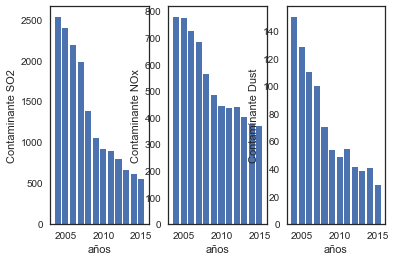

In [250]:
sumaSO2porAño = []

for año in años:
    sumaSO2porAño.append(df2[(df2['ReferenceYear'] == año) & (df2['SO2'] != 0)]['SO2'].values.mean())
sumaSO2porAño = np.array(sumaSO2porAño)


sumaNOxporAño = []

for año in años:
    sumaNOxporAño.append(df2[(df2['ReferenceYear'] == año) & (df2['NOx'] != 0)]['NOx'].values.mean())
sumaNOxporAño = np.array(sumaNOxporAño)




sumaDustporAño = []

for año in años:
    sumaDustporAño.append(df2[(df2['ReferenceYear'] == año) & (df2['Dust'] != 0)]['Dust'].values.mean())
sumaDustporAño = np.array(sumaDustporAño)




from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(1,3)
ax[0].set_xlabel("años")
ax[0].set_ylabel("Contaminante SO2")
ax[0].bar(años, sumaSO2porAño)

ax[1].set_xlabel("años")
ax[1].set_ylabel("Contaminante NOx")
ax[1].bar(años, sumaNOxporAño)



ax[2].set_xlabel("años")
ax[2].set_ylabel("Contaminante Dust")
ax[2].bar(años, sumaDustporAño)

plt.show()


Se seleccionaron los 3 contaminantes los cuales según los datos cada año han ido decreciendo, siguiendo la lógica de la contaminación ambiental el comportamiento que esperabamos era el contrario, sin embargo, la gráfica refleja correctamente los datos (habían muchos vacíos), finalmente se puede decir que los países europeos tienden a contaminar cada vez menos.

#  ¿Cómo es la correlación con la generación de energía y de bioenergía (biomasa)?

In [99]:
df = pd.read_excel("Euro.Emisiones.Generaciones.xlsx")

In [100]:
# Elminando algunas columnas
del df['Unique_Plant_ID']
del df['PlantName']
del df['Refineries']
del df['OtherSector']
del df['ReferenceYear']

### ¿La producción de energía (MWth) aumenta la contaminación?

Como se puede observar en la correlación al aumentar la energía también está aumentando la contaminación en los diferentes países, siendo el NOx el que más se dispara cuando se aumenta la producción de energía.

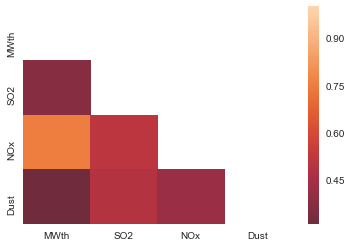

In [102]:
corr = df[[ 'MWth', 'SO2','NOx', "Dust"]].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask,  vmax=1.0, center=0,linewidths=0)

### ¿La producción de Bioenergía (Biomasa) aumenta la contaminación?

Como se observa la producción de Biomasa también tiene efectos en la contaminación, pero en comparación a la producción de energía tiene menos efectos muchos menos significativos, con lo cual se puede concluir bajo esta observación la importancia de usar Bioenergía siendo esta más amigable con el medio ambiente.

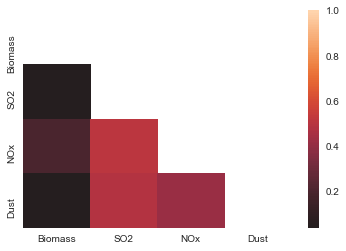

In [108]:
corr = df[['Biomass', 'SO2','NOx', "Dust"]].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask,  vmax=1.0, center=0,linewidths=0)

Dentro de los combustibles que más proporcionan energía los países se encuentran "Otros Sólidos Combustibles"

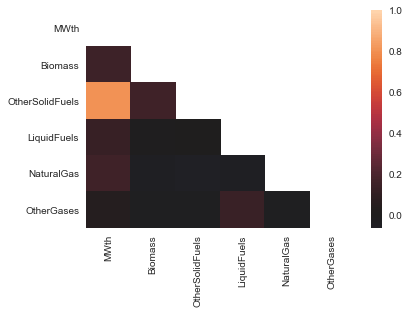

In [104]:

corr = df[['MWth', 'Biomass', 'OtherSolidFuels', 'LiquidFuels', 'NaturalGas', 'OtherGases']].corr()


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask,  vmax=1.0, center=0,linewidths=0)

### Modelos 

In [5]:
import pandas as pd
import statsmodels.api as sm
df_model = pd.read_excel("Euro.Emisiones.Generaciones.xlsx")

y_SO2 = df_model['SO2'].interpolate()
x_SO2 = df_model.drop(['SO2','NOx','Dust','ReferenceYear'],axis=1).interpolate()
model_sm_SO2 = sm.OLS(y_SO2,x_SO2).fit()
model_sm_SO2.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).